## Challenge 2 : apprentissage supervisé

- Andrés Vázquez
- Claire Yao
- Thibaud Gerin-Roze
- Ayoube Fathi
- Bilal Guemes

In [1]:
# Importing some libraries that we'll use later

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score , confusion_matrix, plot_confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

In [2]:
# Here we get the files paths and make a list with the names of the columns we're gonna have 
path = 'HGS/'
directories = os.listdir(path)
columns = ['s'+str(i) for i in range(1,19)]
columns = ['instance','cost_solution'] + columns 

In [3]:
# We open all the files of the data set and get a dataframe with more tha 14 million rows.
#So , we're going to make some feature selection. But first lets se that the dataset don't
#have null values and weird stuff.
dfs = [pd.read_csv(path + i +'/'+ j, sep=';',names = columns) for i in directories for j in os.listdir(path+i)]
df = pd.concat(dfs)
df.head()

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,0,340.769,0.3400,0.1727,484.615,0.2643,0.1321,0.0202,343.036,354.490,0.8213,5.1305
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,0,289.429,0.3198,0.1473,493.286,0.2930,0.1465,0.0364,258.568,368.178,1.3015,4.3288
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,0,304.429,0.3387,0.1202,531.857,0.3954,0.1977,0.2248,254.380,372.682,1.9949,3.8112
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,0,331.769,0.3420,0.1308,552.923,0.2619,0.1310,0.0121,280.978,370.279,0.6057,3.9185
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,0,328.077,0.3352,0.1371,550.000,0.2610,0.1305,0.0082,281.544,368.911,0.4615,3.9908


In [4]:
df.info(memory_usage='deep',show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14109514 entries, 0 to 117291
Data columns (total 20 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   instance       14109514 non-null  object 
 1   cost_solution  14109514 non-null  int64  
 2   s1             14109514 non-null  float64
 3   s2             14109514 non-null  float64
 4   s3             14109514 non-null  float64
 5   s4             14109514 non-null  float64
 6   s5             14109514 non-null  float64
 7   s6             14109514 non-null  float64
 8   s7             14109514 non-null  int64  
 9   s8             14109514 non-null  float64
 10  s9             14109514 non-null  float64
 11  s10            14109514 non-null  float64
 12  s11            14109514 non-null  float64
 13  s12            14109514 non-null  float64
 14  s13            14109514 non-null  float64
 15  s14            14109514 non-null  float64
 16  s15            14109514 non-null  fl

Since the Non-Null count of all the columns is equal to the number of entries, we don't have missing values.

In [5]:
df.describe()

,cost_solution,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
count,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,14109514.0,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07,1.410951e+07
mean,1.723776e+04,1.709193e+02,9.152957e+01,1.160378e-01,7.697894e-02,6.882898e+02,2.089691e+02,0.0,5.219688e+02,3.392315e-01,1.145927e-01,9.334037e+02,2.939263e-01,1.469594e-01,1.245224e-01,4.650337e+02,4.127426e+02,1.676633e+00,3.941560e+00
std,5.029218e+03,4.938682e+01,2.857905e+01,6.445211e-02,5.376710e-02,2.140851e+02,9.542985e+01,0.0,1.966723e+02,5.260405e-02,3.374122e-02,3.907646e+02,6.581859e-02,3.291031e-02,1.117571e-01,1.927279e+02,9.508672e+01,9.509874e-01,6.966633e-01
min,7.766000e+03,5.332490e+01,1.350800e+01,1.790000e-02,3.500000e-03,2.968000e+02,4.596100e+01,0.0,1.580000e+02,1.831000e-01,3.130000e-02,1.880000e+02,2.000000e-01,1.000000e-01,0.000000e+00,7.813330e+01,1.172220e+02,0.000000e+00,2.083300e+00
25%,1.272600e+04,1.298820e+02,7.081870e+01,6.760000e-02,4.120000e-02,4.840830e+02,1.217570e+02,0.0,3.237000e+02,3.038000e-01,9.260000e-02,5.275830e+02,2.454000e-01,1.227000e-01,2.070000e-02,2.937230e+02,3.578140e+02,1.065900e+00,3.438900e+00
50%,1.840800e+04,1.735680e+02,8.915280e+01,9.610000e-02,6.210000e-02,7.867500e+02,1.775540e+02,0.0,5.680000e+02,3.396000e-01,1.130000e-01,1.018700e+03,2.692000e-01,1.346000e-01,7.220000e-02,4.164920e+02,4.516800e+02,1.929300e+00,3.853300e+00
75%,2.169600e+04,2.083620e+02,1.086110e+02,1.600000e-01,9.480000e-02,8.745380e+02,3.026610e+02,0.0,6.813000e+02,3.722000e-01,1.399000e-01,1.237100e+03,3.657000e-01,1.828000e-01,2.457000e-01,6.522920e+02,4.834530e+02,2.211100e+00,4.352200e+00
max,2.758800e+04,4.151350e+02,3.789620e+02,4.840000e-01,5.700000e-01,1.099200e+03,4.305820e+02,0.0,9.790830e+02,4.654000e-01,2.534000e-01,1.856000e+03,5.333000e-01,2.667000e-01,3.503000e-01,9.582020e+02,5.466440e+02,3.824700e+00,9.945000e+00


We are going to drop the column s7, since all it's values are 0. So it's the  feauture that is misscalculated. 

In [4]:
df.drop('s7',1,inplace = True)

/var/folders/_t/q7hcjcqn0g5dkr3kqqrlx4200000gn/T/ipykernel_28965/2608600104.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('s7',1,inplace = True)


In [7]:
df.head()

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,340.769,0.3400,0.1727,484.615,0.2643,0.1321,0.0202,343.036,354.490,0.8213,5.1305
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,289.429,0.3198,0.1473,493.286,0.2930,0.1465,0.0364,258.568,368.178,1.3015,4.3288
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,304.429,0.3387,0.1202,531.857,0.3954,0.1977,0.2248,254.380,372.682,1.9949,3.8112
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,331.769,0.3420,0.1308,552.923,0.2619,0.1310,0.0121,280.978,370.279,0.6057,3.9185
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,328.077,0.3352,0.1371,550.000,0.2610,0.1305,0.0082,281.544,368.911,0.4615,3.9908


Now we are going to look for the correlations between the features, so we can drop some of the feautures. For example, if we have three feautures that have a correlation > 0.9 we're going to drop two and just keep the one that has the higher correlation with the target value. 

/var/folders/_t/q7hcjcqn0g5dkr3kqqrlx4200000gn/T/ipykernel_28322/559621540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


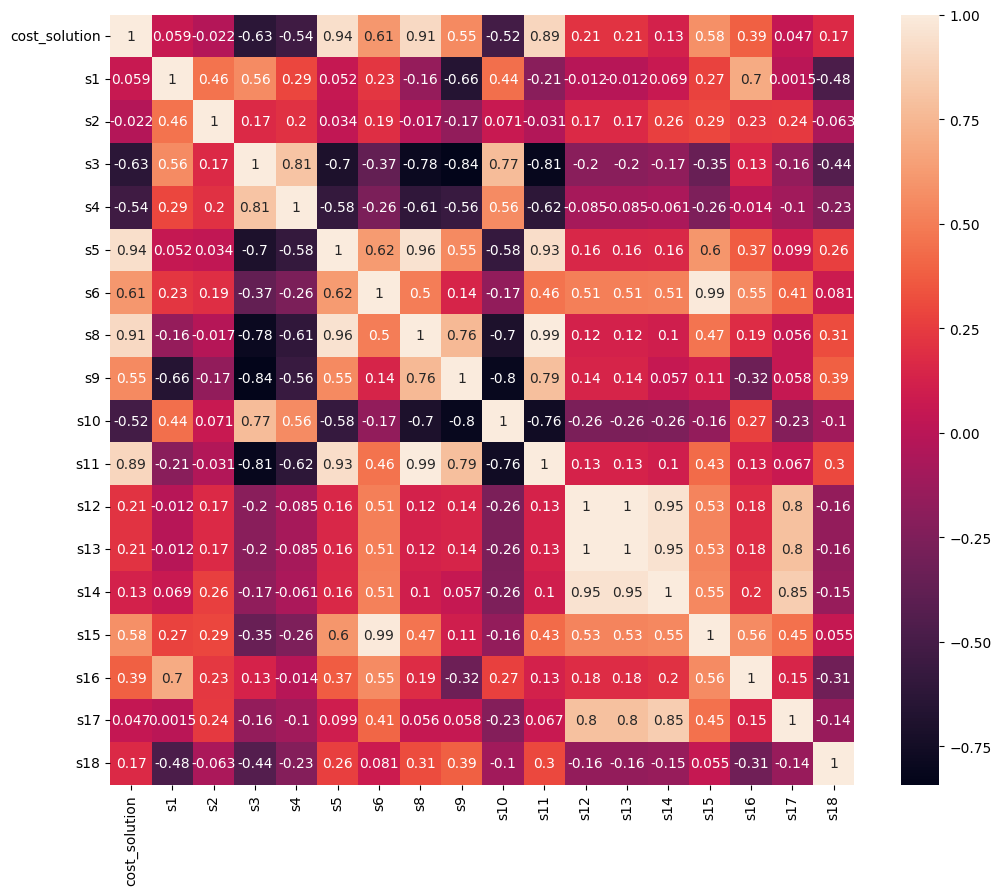

In [6]:
#Let's compute the correlation matrix and find those feautures that are highly correlated
corr_mat = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat,annot=True)
plt.show() 

In [9]:
#Now we are going to select highly correlated features and we are going to drop 
# the ones that have a correlation higher than 0.9
corr_features = {}
threshold = 0.9

for i in range(len(corr_mat.columns)):
    for j in range(i):
        corr_i_j = abs(corr_mat.iloc[i, j])
        if corr_i_j > threshold: 
            corr_features[(corr_mat.columns[i],corr_mat.columns[j])] = corr_i_j                   
corr_features

{('s5', 'cost_solution'): 0.936667473114434,
 ('s8', 'cost_solution'): 0.9122556159051326,
 ('s8', 's5'): 0.9550118980731472,
 ('s11', 's5'): 0.9340366604469228,
 ('s11', 's8'): 0.993298138831954,
 ('s13', 's12'): 0.9999997739449461,
 ('s14', 's12'): 0.9541319651511111,
 ('s14', 's13'): 0.9541377493946464,
 ('s15', 's6'): 0.9887835694252607}

From the highly correlated feautures, we are going to keep the colums s5, s6 and s12 

In [5]:
df.drop(['s11','s8','s13','s14','s15'],axis=1,inplace=True)
df.head()

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s9,s10,s12,s16,s17,s18
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,0.3400,0.1727,0.2643,354.490,0.8213,5.1305
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,0.3198,0.1473,0.2930,368.178,1.3015,4.3288
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,0.3387,0.1202,0.3954,372.682,1.9949,3.8112
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,0.3420,0.1308,0.2619,370.279,0.6057,3.9185
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,0.3352,0.1371,0.2610,368.911,0.4615,3.9908


So after deleting some features that were highly correlated, we were left with only 12 feautures. We can start to make some models with that data.

In [8]:
"""
    Here we apply several times the function train_test_split, because we don't want just 
    to truncate the dataset. We are not ussing the whole dataset because is really big,
    but with the function train_test_split() we are going to get a representative sample
    of the whole dataset.
"""


X = df.drop(['instance', 'cost_solution'], axis=1)
y = df['cost_solution']
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [9]:
y_test.shape

(2822,)

### Building some models

In [9]:
k_neighbors = KNeighborsRegressor(n_neighbors = 15)
k_neighbors.fit(X_train, y_train)
print('K-Neighbors score over 0.02% of the dataset' ,k_neighbors.score(X_test,y_test))
print('K-Neighbors score over 90% of the dataset' ,k_neighbors.score(X_test1,y_test1))

K-Neighbors score over 0.02% of the dataset 0.9838128407603114
K-Neighbors score over 90% of the dataset 0.982099943110435


In [12]:
random_forest = RandomForestRegressor(n_estimators = 20)
random_forest.fit(X_train, y_train)
print('Random forest score over 0.02% of the dataset' ,random_forest.score(X_test,y_test))
print('Random forest score over 90% of the dataset' ,random_forest.score(X_test1,y_test1))

Random forest score over 0.02% of the dataset 0.9991977707735991
Random forest score over 90% of the dataset 0.9990399632860261


In [13]:
decission_tree = DecisionTreeRegressor(random_state = 3)
decission_tree.fit(X_train, y_train)
print('Decission tree score over 0.02% of the dataset' ,decission_tree.score(X_test,y_test))
print('Decision tree score over 90% of the dataset' ,decission_tree.score(X_test1,y_test1))

Decission tree score over 0.02% of the dataset 0.9986217095539026
Decision tree score over 90% of the dataset 0.9982252080161712


In [22]:
linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)
print('Support Vector Regression score over 0.02% of the dataset' ,linear_svr.score(X_test,y_test))
print('Support Vector Regression score over 90% of the dataset' ,linear_svr.score(X_test1,y_test1))

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Regression score over 0.02% of the dataset 0.8702797907145052
Support Vector Regression score over 90% of the dataset 0.8642525486349131


Until here we train three different models with a sample more or less of 0.1% and test them over two different samples. One that is 0.02% of the whole dataset, corresponding to 2822 rows and the other sample that is 90% of the whole dataset, corresponding to 12698563 rows. 

To score the models we used the coefficient of determination R^2 =(1 - u/v) where u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
So the highest score a model can get is 1 so for the k-neighbors, random forest and the decission tree model we have really good scores. 
For the SVR we got a score of ~0.86 which is no that good.

we can conclude from here that the best model we have is the Random Forest Regressor followed by the Decission Tree regressor

For a model that always predicts the expected value of y, then the score will be 0, it means it never fail on the prediction

### Multi Layer Perceptron Regressor (MLP)

In [14]:
sc_X = StandardScaler()
sc_T = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
X_trainscaled1=sc_X.fit_transform(X_test1)
X_testscaled1=sc_X.transform(X_test1)
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,
                   random_state=1, max_iter=2000).fit(X_trainscaled, y_train)


In [15]:
print('MLPRegressor score over 0.02% of the dataset' ,reg.score(X_testscaled,y_test))
print('MLPRegressor score over 90% of the dataset' ,reg.score(X_testscaled1,y_test1))

MLPRegressor score over 0.02% of the dataset 0.9987413017705927
MLPRegressor score over 90% of the dataset 0.9986837929760299


For the MLP we got a score of ~0.998 that is similar to the one of the Decission Tree, but a little bit lower to the one of the Random Forest.

### Making a classification problem

For the classification problem we are going to use the confusion matrix to see how many errors is the model making, and also to see which classes are missclasifying the most. We'll make firs a binary classification good or bad and then we'll make a classificaction with four classes, really bad, bad, good and excelent

We are going to make a boolean variable depending on the cost of the solution. The cost of the solution has a maximum value of max = 27588, and a minimum value of min = 7766.
So, we are going to take the mid value mid = (max + min)/2 = 17677
Our threshold to say that a solution is a good solution is gona be 17677. So all solutions that have a cost <= 17677 are going to have a 1 in the new column, otherwise they're gonna have a 0 

In [6]:
df['good_bad']= [1 if i <= 17677 else 0 for i in df.cost_solution ]

In [17]:
df

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s9,s10,s12,s16,s17,s18,good_bad
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,0.3400,0.1727,0.2643,354.490,0.8213,5.1305,1
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,0.3198,0.1473,0.2930,368.178,1.3015,4.3288,1
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,0.3387,0.1202,0.3954,372.682,1.9949,3.8112,1
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,0.3420,0.1308,0.2619,370.279,0.6057,3.9185,1
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,0.3352,0.1371,0.2610,368.911,0.4615,3.9908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117287,XML100_3113_17,22654,170.7360,92.6274,0.0803,0.0811,878.917,313.289,0.3445,0.1133,0.3704,488.166,2.2111,4.0833,0
117288,XML100_3113_17,22654,196.3670,93.4426,0.0828,0.0412,869.833,316.599,0.3374,0.1075,0.3704,494.770,2.2111,3.9010,0
117289,XML100_3113_17,22654,184.5730,104.4960,0.0833,0.0444,876.917,270.053,0.3763,0.1093,0.2546,482.179,1.5456,3.7250,0
117290,XML100_3113_17,22654,184.6250,103.5100,0.0778,0.0729,870.500,331.680,0.3344,0.1204,0.3704,493.351,2.2111,4.7604,0


In [10]:
#Here we are going to make the same approach than above to get the train and test dataset.
# We'll test the over the same size samples than the previous models

X = df.drop(['instance', 'cost_solution','good_bad'], axis=1)
y = df['good_bad']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [12]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
prediction1 = logistic_reg.predict(X_test) # 0.02% of the dataset
prediction2 = logistic_reg.predict(X_test1) # 90% of the dataset
accuracy1 = float(np.sum(prediction1==y_test))/y_test.shape[0]
accuracy2 = float(np.sum(prediction2==y_test1))/y_test1.shape[0]
print("Logistic regression accuracy over 0.02% of the dataset:",accuracy1)
print("Logistic regression accuracy over 90% of the dataset:",accuracy2)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression accuracy over 0.02% of the dataset: 0.9748405386250886
Logistic regression accuracy over 90% of the dataset: 0.977107252214286


Confusion Matrix over 0.02% of the dataset:


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


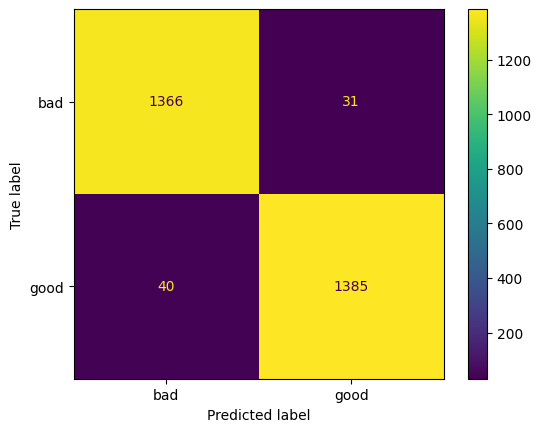

In [14]:
print('Confusion Matrix over 0.02% of the dataset:')
plot_confusion_matrix(logistic_reg, X_test , y_test,
                     display_labels = ['bad','good'])

Confusion Matrix over 90% of the dataset:


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


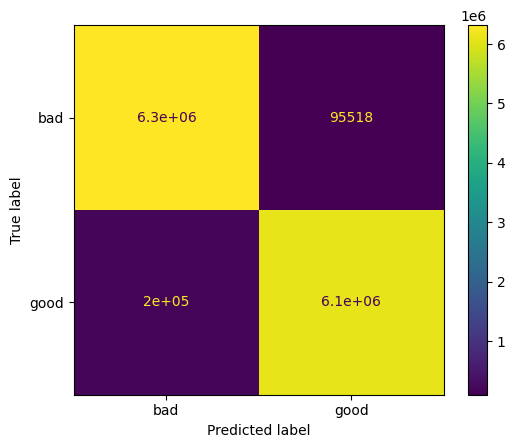

In [15]:
print('Confusion Matrix over 90% of the dataset:')
plot_confusion_matrix(logistic_reg, X_test1 , y_test1,
                     display_labels = ['bad','good'])

In [16]:
gradient_booster = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05,
                                              max_features=5, random_state=100)
gradient_booster.fit(X_train, y_train)
prediction1 = gradient_booster.predict(X_test) # 0.02% of the dataset
prediction2 = gradient_booster.predict(X_test1) # 90% of the dataset
accuracy1 = float(np.sum(prediction1==y_test))/y_test.shape[0]
accuracy2 = float(np.sum(prediction2==y_test1))/y_test1.shape[0]
print("Gradient booster accuracy over 0.02% of the dataset:",accuracy1)
print("Gradient booster accuracy over 90% of the dataset:",accuracy2)

Gradient booster accuracy over 0.02% of the dataset: 1.0
Gradient booster accuracy over 90% of the dataset: 0.9998935312601906


Confusion Matrix over 0.2% of the dataset:


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


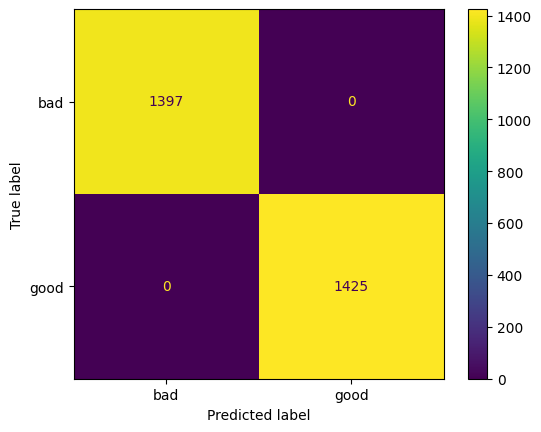

In [17]:
print('Confusion Matrix over 0.2% of the dataset:')
plot_confusion_matrix(gradient_booster, X_test , y_test,
                     display_labels = ['bad','good'])

Confusion Matrix over 90% of the dataset:


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


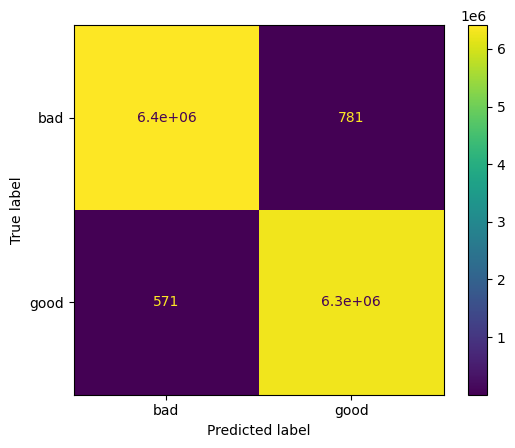

In [18]:
print('Confusion Matrix over 90% of the dataset:')
plot_confusion_matrix(gradient_booster, X_test1 , y_test1,
                     display_labels = ['bad','good'])

Now we are going to make three classes for the  target variable:

- mauvaise = 0
- moyenne = 1
- bonne = 2
- excellente = 3

So, the first thing to do is to make the target variable:
We classify the solutions as mauvaise, moyenne, bonne and excellente, according to the quartiles of the values of the target value (see them at the very begining of the notebook):

In [19]:
good_bad = []

for i in df.cost_solution:
    if i <= 12726:
        good_bad.append(3)
    elif i <= 18408:
        good_bad.append(2)
    elif i <= 21696:
        good_bad.append(1)
    else:
        good_bad.append(0)
df['good_bad']= good_bad
df

,instance,cost_solution,s1,s2,s3,s4,s5,s6,s9,s10,s12,s16,s17,s18,good_bad
0,XML100_2213_16,12777,137.0910,98.5511,0.2196,0.3788,425.538,112.713,0.3400,0.1727,0.2643,354.490,0.8213,5.1305,2
1,XML100_2213_16,12591,98.3619,42.7941,0.1051,0.0529,420.071,121.849,0.3198,0.1473,0.2930,368.178,1.3015,4.3288,3
2,XML100_2213_16,12681,103.3510,49.7809,0.1003,0.0433,418.429,115.255,0.3387,0.1202,0.3954,372.682,1.9949,3.8112,3
3,XML100_2213_16,12691,155.4840,107.5330,0.1944,0.2361,416.538,124.092,0.3420,0.1308,0.2619,370.279,0.6057,3.9185,3
4,XML100_2213_16,12690,158.8430,105.3390,0.2202,0.2433,415.769,125.099,0.3352,0.1371,0.2610,368.911,0.4615,3.9908,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117287,XML100_3113_17,22654,170.7360,92.6274,0.0803,0.0811,878.917,313.289,0.3445,0.1133,0.3704,488.166,2.2111,4.0833,0
117288,XML100_3113_17,22654,196.3670,93.4426,0.0828,0.0412,869.833,316.599,0.3374,0.1075,0.3704,494.770,2.2111,3.9010,0
117289,XML100_3113_17,22654,184.5730,104.4960,0.0833,0.0444,876.917,270.053,0.3763,0.1093,0.2546,482.179,1.5456,3.7250,0
117290,XML100_3113_17,22654,184.6250,103.5100,0.0778,0.0729,870.500,331.680,0.3344,0.1204,0.3704,493.351,2.2111,4.7604,0


In [20]:
X = df.drop(['instance', 'cost_solution','good_bad'], axis=1)
y = df['good_bad']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [24]:
gradient_booster = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05, max_features=5, random_state=100)
gradient_booster.fit(X_train, y_train)
prediction1 = gradient_booster.predict(X_test) # 0.02% of the dataset
prediction2 = gradient_booster.predict(X_test1) # 90% of the dataset
accuracy1 = float(np.sum(prediction1==y_test))/y_test.shape[0]
accuracy2 = float(np.sum(prediction2==y_test1))/y_test1.shape[0]
print("Gradient booster accuracy over 0.02% of the dataset:",accuracy1)
print("Gradient booster accuracy over 90% of the dataset:",accuracy2)

Gradient booster accuracy over 0.02% of the dataset: 0.9822820694542878
Gradient booster accuracy over 90% of the dataset: 0.9792281221111396


Confusion Matrix over 0.2% of the dataset:


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


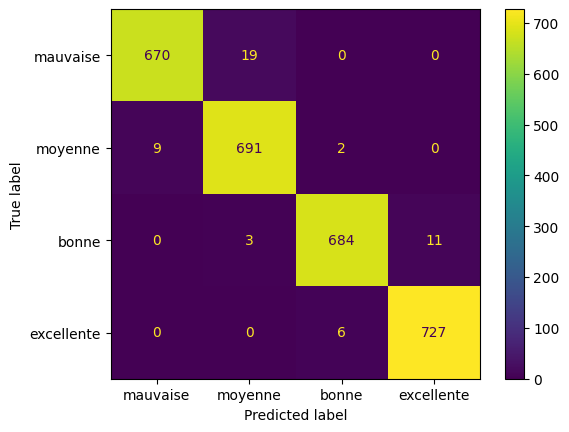

In [25]:
print('Confusion Matrix over 0.2% of the dataset:')
plot_confusion_matrix(gradient_booster, X_test , y_test,
                     display_labels = ['mauvaise','moyenne','bonne','excellente'])

Confusion Matrix over 90% of the dataset:


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


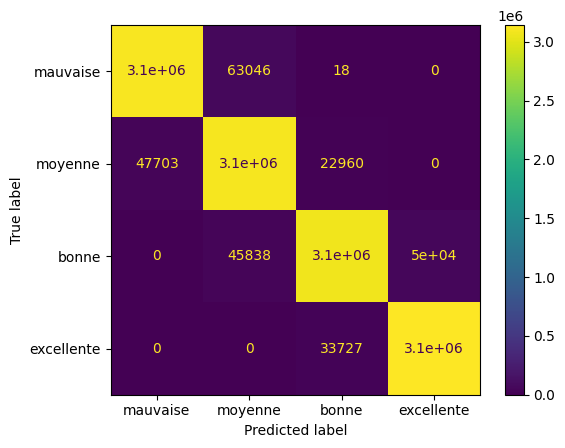

In [26]:
print('Confusion Matrix over 90% of the dataset:')
plot_confusion_matrix(gradient_booster, X_test1 , y_test1,
                     display_labels = ['mauvaise','moyenne','bonne','excellente'])

So for this model we got an accuracy of 0.979 which is a high score. And from the confussion matrix we can see that the model dont classify an excellent solution as a moyenne or mauvaise solution, also the worst prediction for a mauvaise solution it will be moyenne. Which is good because we can trust the model that if the answer is excellent it we can trust that it will be at least a bonne solution.